In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
np.set_printoptions(precision=5, suppress=True) 

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
np.set_printoptions(precision=5, suppress=True) 

In [22]:
d2 = pd.read_pickle('d2.pkl')
d2.info()
X= np.array(d2.iloc[:,5:])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Columns: 159 entries, town to developer_rate
dtypes: float64(152), int64(2), object(5)
memory usage: 706.2+ KB


In [23]:
X = preprocessing.scale(X)

In [47]:
pca = PCA(n_components=58)
X_r = pca.fit(X).transform(X)
sum(pca.explained_variance_ratio_)

0.89975211528369414

In [88]:
comp = list(zip(pca.components_[0],d2.columns[5:]))
comp.sort(key=lambda tup: tup[0])
comp

[(-0.15922473618572289, 'p_marrfam'),
 (-0.15362220099871873, 'hh_inc_med'),
 (-0.15010557706221259, 'p_highsch'),
 (-0.14938715177800926, 'p_hu_own_occ'),
 (-0.14577584446428793, 'p_occ_bus'),
 (-0.14330147947305705, 'p_hu_gt8room'),
 (-0.14320835793261383, 'hh_inc_mean'),
 (-0.14134799077244894, 'p_hu_2car'),
 (-0.14066755892368951, 'p_hu_8room'),
 (-0.13832040688946251, 'p_bachdeg'),
 (-0.13437409486470786, 'p_150to200'),
 (-0.13258587363399474, 'p_over200'),
 (-0.13254103019681088, 'p_1hu_bldg_det'),
 (-0.1196916741868122, 'p_hu_1perroom'),
 (-0.11594328553113001, 'p_hu_3car'),
 (-0.10216399151595344, 'p_white'),
 (-0.10011207828300009, 'p_ind_fire'),
 (-0.09909172217487687, 'p_hu_rentgt1500'),
 (-0.096128480684849207, 'hu_val_median'),
 (-0.094880045469018764, 'p_100to150'),
 (-0.094004388714347784, 'p_nat_citz'),
 (-0.087543990035128041, 'p_samehouse'),
 (-0.087395960490223967,
  'AverageTotalPropertyTaxes(notincludingcreditsanddeductions)'),
 (-0.084420457800821899, 'p_spk_engl'

In [89]:
comp1 = list(zip(pca.components_[1],d2.columns[5:]))
comp1.sort(key=lambda tup: tup[0])
comp1

[(-0.18435348674410793, 'p_com_transit'),
 (-0.16619139385882381,
  'AverageTotalPropertyTaxes(notincludingcreditsanddeductions)'),
 (-0.16435844232326946, 'p_asian'),
 (-0.1383947640567052, 'p_as_chin'),
 (-0.13600858646897918, 'p_class_wage'),
 (-0.13261278865006085, 'p_other_lat'),
 (-0.12928493387179099, 'CYMunicipalLibraryRate'),
 (-0.12500345426687276, 'p_asian_ind'),
 (-0.12453750872832278, 'p_bachdeg'),
 (-0.124330079863145, 'p_20hu_bldg'),
 (-0.12360287565673424, 'hh_size_own_occ'),
 (-0.11645133199878321, 'p_latino'),
 (-0.11532395435086769, 'p_abroad1yr'),
 (-0.11314764432611341, 'p_ind_fire'),
 (-0.10815231000770377, 'hu_val_median'),
 (-0.1073764046407696, 'p_cuban'),
 (-0.10658772890504302, 'p_over200'),
 (-0.10599577681130692, 'p_ind_info'),
 (-0.10468162092945794, 'avg_hh_size'),
 (-0.10206691128237244, 'hh_inc_mean'),
 (-0.10110211064019616, 'p_hu_3room'),
 (-0.10012703553077046, 'p_age35to44'),
 (-0.094841650807875655, 'p_as_other'),
 (-0.093047157505560973, 'p_ind_pr

In [49]:
X_r.shape

(565, 58)

In [50]:
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.19651  0.09568  0.0737   0.04367  0.03581  0.02611  0.02585  0.02155
  0.01934  0.01847  0.01717  0.01538  0.01492  0.01401  0.0131   0.01205
  0.01173  0.01063  0.0102   0.00965  0.00916  0.00886  0.00843  0.00824
  0.00803  0.00797  0.00757  0.00731  0.00712  0.00691  0.00678  0.00653
  0.00635  0.00618  0.00601  0.0058   0.00569  0.00552  0.00545  0.00522
  0.00508  0.00504  0.00489  0.00483  0.00464  0.0044   0.00438  0.00429
  0.00411  0.00409  0.00406  0.00392  0.00381  0.00371  0.00361  0.00351
  0.00344  0.0033 ]


In [53]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

for m in methods:
    Z = linkage(X_r, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print(m,": ", c)


single :  0.858809611017
complete :  0.760959460012
average :  0.902979640592
weighted :  0.665155319354
centroid :  0.890733187394
median :  0.860773705426
ward :  0.269942519018


In [57]:
Z = linkage(X_r, 'ward')
Z[-10:]

array([[ 1112.     ,  1116.     ,    49.937  ,   210.     ],
       [ 1109.     ,  1118.     ,    52.4793 ,    94.     ],
       [ 1111.     ,  1115.     ,    52.60422,   178.     ],
       [ 1113.     ,  1114.     ,    57.36733,    55.     ],
       [ 1121.     ,  1122.     ,    63.86601,   233.     ],
       [  520.     ,  1089.     ,    64.90106,    27.     ],
       [ 1119.     ,  1124.     ,    77.38645,   237.     ],
       [  542.     ,  1120.     ,    80.25787,    95.     ],
       [ 1125.     ,  1126.     ,   106.49528,   332.     ],
       [ 1123.     ,  1127.     ,   137.53118,   565.     ]])

In [58]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

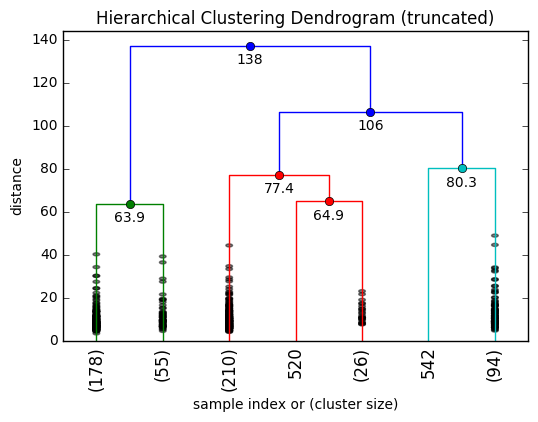

In [99]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=7,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [94]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red', 'blue', 'violet','maroon']
lw = 2

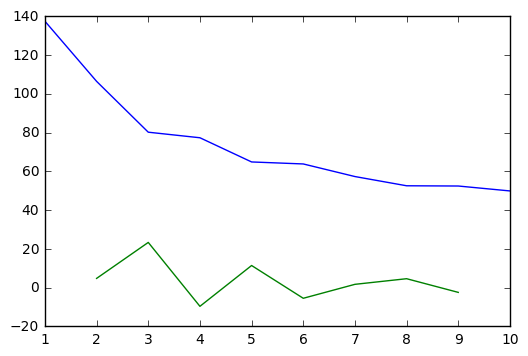

clusters: 3


In [95]:
## Elbow Method

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [100]:
from scipy.cluster.hierarchy import fcluster
max_d = 60
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 6, 4, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 1, 4, 4, 3, 3, 6, 1, 3, 6, 3,
       2, 2, 1, 6, 6, 6, 1, 1, 2, 1, 6, 6, 6, 1, 6, 1, 1, 6, 6, 2, 6, 2, 6,
       2, 3, 2, 1, 2, 1, 1, 6, 6, 1, 3, 3, 1, 3, 1, 6, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 6, 2, 1, 2, 3, 2, 3, 3, 2, 6, 3, 1, 3, 2, 1, 6, 1, 1, 2, 1,
       2, 3, 3, 6, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 4, 1, 1, 3, 1, 3, 3, 6, 3, 3, 3, 3, 3,
       3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 6, 3, 3, 6, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 3, 3, 6, 4, 6, 4, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 6,
       4, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 1, 6, 6, 2,
       1, 2, 6, 2, 1, 2, 1, 6, 2, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 6, 6, 6, 6, 6, 6, 6,
       6, 1, 6, 6, 6, 1, 1, 3, 1, 1, 1, 1, 1, 6, 1, 3, 3, 3, 1, 1, 1, 6, 3,
       1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 6, 1, 1, 1, 1, 1, 1, 6, 1, 6, 2, 6,
       1, 1,

In [101]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'purple','grey'] 

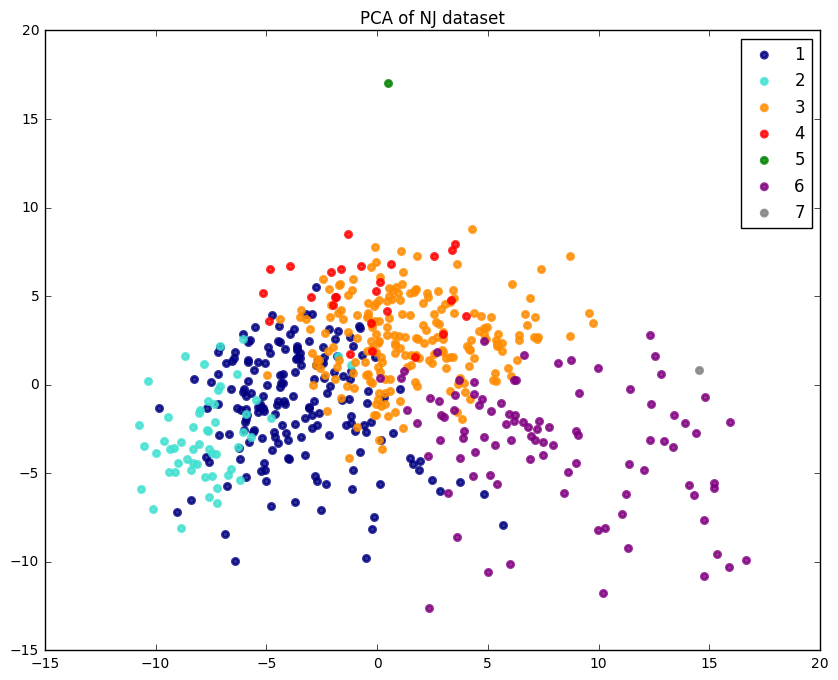

In [102]:
plt.figure(figsize=(10,8))
for color, i, cluster in zip(colors, [ 1, 2,3,4,5,6,7], [1, 2,3,4,5,6,7]):
    plt.scatter(X_r[clusters == i, 0], X_r[clusters == i, 1], color=color, alpha=.8, lw=lw,
                label=cluster)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of NJ dataset')

In [103]:
df_to_d3 = d2.loc[:,'FIPS':'city_town'] 
df_to_d3['cluster'] = clusters
df_to_d3.columns = ['id','name','cluster']
#cluster_labels]])
df_to_d3.head()
df_to_d3.to_csv('clustersPCA7.tsv',sep = '\t', index = False)